# Azure ML service and Excel integration

<img src="https://www.allgeier.ch/wp-content/uploads/2018/04/microsoft-azure-ml.png">

## 1. Informations

In [2]:
import datetime
now = datetime.datetime.now()
print(now)

2019-10-31 08:54:58.850734


In [3]:
import sys
print("Python version: ",sys.version)

Python version:  3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]


### Installing ou upgrading Azure ML SDK

In [4]:
#!pip install azureml-sdk

In [5]:
#!pip install --upgrade azureml-sdk

## 2. Connection to the Azure ML workspace

In [ ]:
# Workspace
import os
subscription_id = os.environ.get("SUBSCRIPTION_ID", "Your Azure Subscription ID")
resource_group = os.environ.get("RESOURCE_GROUP", "azuremlserviceRG")
workspace_name = os.environ.get("WORKSPACE_NAME", "azuremlservice")

In [ ]:
from azureml.core import Workspace
try:
   ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
   ws.write_config()
   print("OK")
except:
   print("Error: Workspace not found")

In [6]:
import azureml.core
from azureml.core.workspace import Workspace
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from azureml.core.model import Model
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from azureml.core import Environment
from azureml.core.model import InferenceConfig

print("Azure ML service:", azureml.core.VERSION)

Azure ML service: 1.0.69


In [7]:
ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep='\n')

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code F9MGKFEYJ to authenticate.
Interactive authentication successfully completed.
azuremlservice
azuremlserviceresourcegroup
westeurope
70b8f39e-8863-49f7-b6ba-34a80799550c


## 3. ML

### Boston dataset example

Feature Descriptions				
1. CRIM - per capita crime rate by town				
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.				
3. INDUS - proportion of non-retail business acres per town.				
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)				
5. NOX - nitric oxides concentration (parts per 10 million)				
6. RM - average number of rooms per dwelling				
7. AGE - proportion of owner-occupied units built prior to 1940				
8. DIS - weighted distances to five Boston employment centres				
9. RAD - index of accessibility to radial highways				
10. TAX - full-value property-tax rate per $10000	

11. PTRATIO - pupil-teacher ratio by town				
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town				
13. LSTAT - pct lower status of the population				
14. MEDV - Median value of owner-occupied homes in $1000's

In [8]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [9]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22
461,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [11]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,3.510706,11.233038,10.946755,0.061947,0.552433,6.290059,67.433923,3.792998,9.587021,404.988201,18.456342,359.382950,12.522360
std,8.401706,22.390965,6.680767,0.241415,0.114991,0.698391,28.258177,2.028914,8.719865,168.415413,2.160973,87.901998,7.066379
min,0.010960,0.000000,1.250000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.520000,1.730000
25%,0.082325,0.000000,5.130000,0.000000,0.449000,5.888500,42.500000,2.111400,4.000000,277.000000,17.400000,376.715000,6.965000
50%,0.253560,0.000000,8.560000,0.000000,0.524000,6.216000,76.000000,3.370000,5.000000,329.000000,19.000000,391.270000,10.970000
75%,3.675945,18.750000,18.100000,0.000000,0.624000,6.622000,92.750000,5.100400,24.000000,666.000000,20.200000,396.270000,16.580000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.204753,0.425818,-0.055235,0.434833,-0.184669,0.349918,-0.391734,0.621385,0.588851,0.288124,-0.280482,0.477819
ZN,-0.204753,1.000000,-0.516629,-0.041539,-0.511711,0.299813,-0.555304,0.650986,-0.316152,-0.316782,-0.363633,0.170570,-0.413617
INDUS,0.425818,-0.516629,1.000000,0.068071,0.760152,-0.382410,0.603696,-0.690346,0.630693,0.727890,0.372754,-0.350060,0.598210
CHAS,-0.055235,-0.041539,0.068071,1.000000,0.111242,0.026001,0.086862,-0.094353,-0.006082,-0.026469,-0.090075,0.055025,-0.010977
NOX,0.434833,-0.511711,0.760152,0.111242,1.000000,-0.295023,0.724084,-0.769641,0.644060,0.687197,0.178311,-0.326015,0.607530
RM,-0.184669,0.299813,-0.382410,0.026001,-0.295023,1.000000,-0.224674,0.196060,-0.207914,-0.274554,-0.346861,0.076177,-0.586907
AGE,0.349918,-0.555304,0.603696,0.086862,0.724084,-0.224674,1.000000,-0.733293,0.451811,0.489212,0.218967,-0.248098,0.598273
DIS,-0.391734,0.650986,-0.690346,-0.094353,-0.769641,0.196060,-0.733293,1.000000,-0.507179,-0.529518,-0.179850,0.278123,-0.500121
RAD,0.621385,-0.316152,0.630693,-0.006082,0.644060,-0.207914,0.451811,-0.507179,1.000000,0.928314,0.463551,-0.453760,0.528127
TAX,0.588851,-0.316782,0.727890,-0.026469,0.687197,-0.274554,0.489212,-0.529518,0.928314,1.000000,0.460019,-0.445824,0.561716


In [13]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

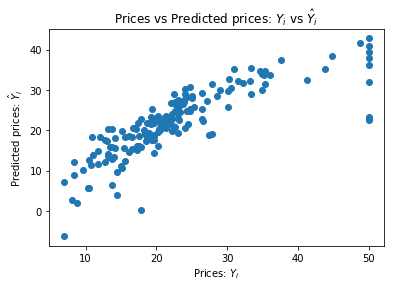

In [14]:
Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [20]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


### Let's register the ML model

In [21]:
model_file_name = 'boston_model.pkl'
joblib.dump(value = lm, filename = model_file_name)

registered_trained_model = Model.register(workspace=ws, model_path=model_file_name, model_name=model_file_name)

Registering model boston_model.pkl


## 4. Let's deploy the model to ACI

### 4.1 Generating the scoring file

In [22]:
%%writefile score.py
import pickle
import json
import numpy as np
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from azureml.core.model import Model

from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType

def init():
    global model
    # note here "sklearn_regression_model.pkl" is the name of the model registered under
    # this is a different behavior than before when the code is run locally, even though the code is the same.
    model_path = Model.get_model_path('boston_model.pkl')
    # deserialize the model file back into a sklearn model
    model = joblib.load(model_path)

input_sample = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]])
output_sample = np.array([3726.995])

@input_schema('data', NumpyParameterType(input_sample))
@output_schema(NumpyParameterType(output_sample))
def run(data):
    try:
        result = model.predict(data)
        # you can return any datatype as long as it is JSON-serializable
        return result.tolist()[0]
    except Exception as e:
        error = str(e)
        return error

Overwriting score.py


### 4.2 Environment file

In [23]:
%%writefile myenv.yml
name: project_environment
dependencies:
  - python=3.6.2
  - pip:
    - azureml-defaults
    - scikit-learn
    - numpy
    - pyspark
    - inference-schema[numpy-support]

Overwriting myenv.yml


In [24]:
env = Environment.from_conda_specification(name='deploytocloudenv', file_path='myenv.yml')
inference_config = InferenceConfig(entry_script="score.py", environment=env)

### 4.3 Deploying the ML model to ACI (Azure Container Instance)

In [29]:
%%time
from azureml.core.webservice import AciWebservice, Webservice
from azureml.exceptions import WebserviceException

deployment_config = AciWebservice.deploy_configuration(cpu_cores=1, memory_gb=1)
aci_service_name = 'bostonhouseprice'

try:
    # if you want to get existing service below is the command
    # since aci name needs to be unique in subscription deleting existing aci if any
    # we use aci_service_name to create azure aci
    service = Webservice(ws, name=aci_service_name)
    if service:
        service.delete()
except WebserviceException as e:
    print()

service = Model.deploy(ws, aci_service_name, [registered_trained_model], inference_config, deployment_config)

service.wait_for_deployment(True)
print(service.state)

Running.........................
SucceededACI service creation operation finished, operation "Succeeded"
Healthy
CPU times: user 490 ms, sys: 105 ms, total: 595 ms
Wall time: 2min 23s


## 5. Testing

### 5.1 Generating the input data into a JSON file

In [30]:
import json
test_sample = json.dumps({'data': [
    [0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]})

In [31]:
test_sample

'{"data": [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]]}'

### 5.2 Scoring endpoint (to use later in the Excel file)

In [32]:
service.scoring_uri

'http://5256a54c-20ec-49fb-bdf7-6aaa95a9fd22.westeurope.azurecontainer.io/score'

### 5.3 Let's test

In [33]:
test_sample_encoded = bytes(test_sample, encoding='utf8')

print("Input data: ")
print(test_sample_encoded)
prediction = service.run(input_data=test_sample_encoded)
print()
print("Model prediction = ", prediction)

Input data: 
b'{"data": [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]]}'

Model prediction =  30.137479432585813


### Second test

In [39]:
import json
test_sample2 = json.dumps({'data': [
    [0.00432,16.0,1.1,0.12,0.422,6.75,65.2,4.0900,1.0,296.0,16.3,496.90,6.8]]})

In [40]:
test_sample_encoded = bytes(test_sample2, encoding='utf8')

print("Input data: ")
print(test_sample_encoded)
prediction = service.run(input_data=test_sample_encoded)
print()
print("Model prediction = ", prediction)

Input data: 
b'{"data": [[0.00432, 16.0, 1.1, 0.12, 0.422, 6.75, 65.2, 4.09, 1.0, 296.0, 16.3, 496.9, 6.8]]}'

Model prediction =  31.744508810239935


> End